K-Nearest Neighbors is one of the most basic yet essential classification algorithms in Machine Learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining, and intrusion detection. The K-Nearest Neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems. The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other. KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points on a graph. There are other ways of calculating distance, which might be preferable depending on the problem we are solving. However, the straight-line distance (also called the Euclidean distance) is a popular and familiar choice. It is widely disposable in real-life scenarios since it is non-parametric, meaning, it does not make any underlying assumptions about the distribution of data (as opposed to other algorithms such as GMM, which assume a Gaussian distribution of the given data). This article illustrates K-nearest neighbors on a sample random data using sklearn library.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv("/content/prostate.csv")
df.head()


,lcavol,lweight,age,lbph,lcp,gleason,pgg45,lpsa,Target
0,-0.579818,2.769459,50,-1.386294,-1.386294,6,0,-0.430783,0
1,-0.994252,3.319626,58,-1.386294,-1.386294,6,0,-0.162519,0
2,-0.510826,2.691243,74,-1.386294,-1.386294,7,20,-0.162519,0
3,-1.203973,3.282789,58,-1.386294,-1.386294,6,0,-0.162519,0
4,0.751416,3.432373,62,-1.386294,-1.386294,6,0,0.371564,0


Standardize the Variables
Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier than variables that are on a small scale.

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df.drop('Target', axis=1))
scaled_features = scaler.transform(df.drop('Target',
										axis=1))

df_feat = pd.DataFrame(scaled_features,
					columns=df.columns[:-1])
df_feat.head()


,lcavol,lweight,age,lbph,lcp,gleason,pgg45,lpsa
0,-1.645861,-2.016634,-1.872101,-1.030029,-0.867655,-1.047571,-0.868957,-2.533318
1,-1.999313,-0.725759,-0.791989,-1.030029,-0.867655,-1.047571,-0.868957,-2.299712
2,-1.587021,-2.200154,1.368234,-1.030029,-0.867655,0.344407,-0.156155,-2.299712
3,-2.178174,-0.812191,-0.791989,-1.030029,-0.867655,-1.047571,-0.868957,-2.299712
4,-0.510513,-0.461218,-0.251933,-1.030029,-0.867655,-1.047571,-0.868957,-1.834631


Model Development and Evaluation
Now by using the sklearn library implementation of the KNN algorithm we will train a model on that. Also after the training purpose, we will evaluate our model by using the confusion matrix and classification report.

In [5]:
from sklearn.metrics import classification_report,\
	confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test,\
	y_train, y_test = train_test_split(scaled_features,
									df['Target'],
									test_size=0.30)

# Remember that we are trying to come up
# with a model to predict whether
# someone will Target or not.
# We'll start with k = 1.

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

# Predictions and Evaluations
# Let's evaluate our KNN model !
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


[[21  3]
 [ 3  3]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        24
           1       0.50      0.50      0.50         6

    accuracy                           0.80        30
   macro avg       0.69      0.69      0.69        30
weighted avg       0.80      0.80      0.80        30



Elbow Method
Let’s go ahead and use the elbow method to pick a good K Value

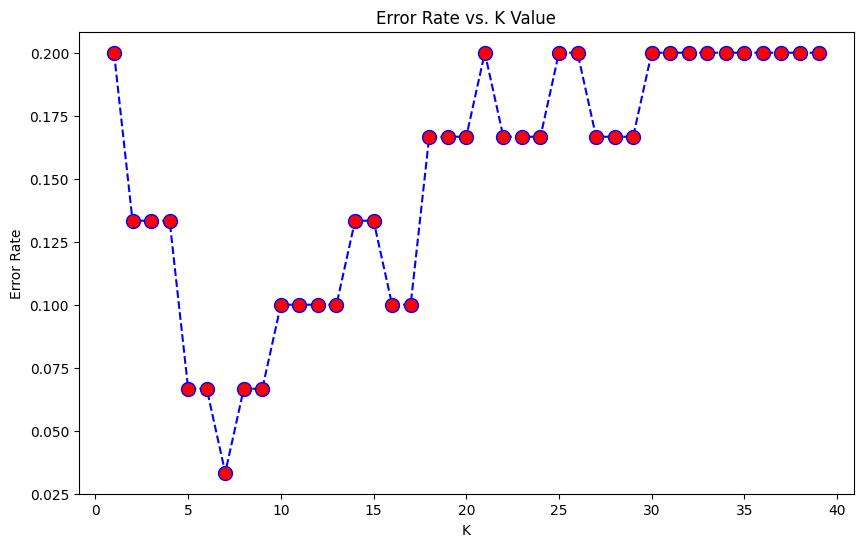

In [6]:
error_rate = []

# Will take some time
for i in range(1, 40):

	knn = KNeighborsClassifier(n_neighbors=i)
	knn.fit(X_train, y_train)
	pred_i = knn.predict(X_test)
	error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue',
		linestyle='dashed', marker='o',
		markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


Here we can observe that the error value is oscillating and then it increases to become saturated approximately. So, let’s take the value of K equal to 10 as that value of error is quite redundant.



In [7]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K = 1
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K = 1')
print('Confusion Matrix')
print(confusion_matrix(y_test, pred))
print('Classification Report')
print(classification_report(y_test, pred))


WITH K = 1
Confusion Matrix
[[21  3]
 [ 3  3]]
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        24
           1       0.50      0.50      0.50         6

    accuracy                           0.80        30
   macro avg       0.69      0.69      0.69        30
weighted avg       0.80      0.80      0.80        30



Implementation of K-Nearest Neighbors from Scratch using Python

In [8]:
# Importing libraries

import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split

from scipy.stats import mode

from sklearn.neighbors import KNeighborsClassifier

# K Nearest Neighbors Classification

class K_Nearest_Neighbors_Classifier() :

	def __init__( self, K ) :

		self.K = K

	# Function to store training set

	def fit( self, X_train, Y_train ) :

		self.X_train = X_train

		self.Y_train = Y_train

		# no_of_training_examples, no_of_features

		self.m, self.n = X_train.shape

	# Function for prediction

	def predict( self, X_test ) :

		self.X_test = X_test

		# no_of_test_examples, no_of_features

		self.m_test, self.n = X_test.shape

		# initialize Y_predict

		Y_predict = np.zeros( self.m_test )

		for i in range( self.m_test ) :

			x = self.X_test[i]

			# find the K nearest neighbors from current test example

			neighbors = np.zeros( self.K )

			neighbors = self.find_neighbors( x )

			# most frequent class in K neighbors

			Y_predict[i] = mode( neighbors )[0][0]

		return Y_predict

	# Function to find the K nearest neighbors to current test example

	def find_neighbors( self, x ) :

		# calculate all the euclidean distances between current
		# test example x and training set X_train

		euclidean_distances = np.zeros( self.m )

		for i in range( self.m ) :

			d = self.euclidean( x, self.X_train[i] )

			euclidean_distances[i] = d

		# sort Y_train according to euclidean_distance_array and
		# store into Y_train_sorted

		inds = euclidean_distances.argsort()

		Y_train_sorted = self.Y_train[inds]

		return Y_train_sorted[:self.K]

	# Function to calculate euclidean distance

	def euclidean( self, x, x_train ) :

		return np.sqrt( np.sum( np.square( x - x_train ) ) )

# Driver code

def main() :

	# Importing dataset

	df = pd.read_csv( "/content/diabetes.csv" )

	X = df.iloc[:,:-1].values

	Y = df.iloc[:,-1:].values

	# Splitting dataset into train and test set

	X_train, X_test, Y_train, Y_test = train_test_split(
	X, Y, test_size = 1/3, random_state = 0 )

	# Model training

	model = K_Nearest_Neighbors_Classifier( K = 3 )

	model.fit( X_train, Y_train )

	model1 = KNeighborsClassifier( n_neighbors = 3 )

	model1.fit( X_train, Y_train )

	# Prediction on test set

	Y_pred = model.predict( X_test )

	Y_pred1 = model1.predict( X_test )

	# measure performance

	correctly_classified = 0

	correctly_classified1 = 0

	# counter

	count = 0

	for count in range( np.size( Y_pred ) ) :

		if Y_test[count] == Y_pred[count] :

			correctly_classified = correctly_classified + 1

		if Y_test[count] == Y_pred1[count] :

			correctly_classified1 = correctly_classified1 + 1

		count = count + 1

	print( "Accuracy on test set by our model	 : ", (
	correctly_classified / count ) * 100 )
	print( "Accuracy on test set by sklearn model : ", (
	correctly_classified1 / count ) * 100 )


if __name__ == "__main__" :

	main()


Accuracy on test set by our model	 :  63.888888888888886
Accuracy on test set by sklearn model :  63.888888888888886


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


The accuracy achieved by our model and sklearn is equal which indicates the correct implementation of our model.

Note: Above Implementation is for model creation from scratch, not to improve the accuracy of the diabetes dataset.

K Nearest Neighbors Regression:

K Nearest Neighbors Regression first stores the training examples. During prediction, when it encounters a new instance ( or test example ) to predict,  it finds the K number of training instances nearest to this new instance. Then predicts the target value for this instance by calculating the mean of the target values of these nearest neighbors.


The optimal choice for K is by validating errors on test data. K can also be chosen by the square root of m, where m is the number of examples in the dataset.

Pseudocode :
1.Store all training examples.
2.Repeat steps 3, 4, and 5 for each test example.
3.Find the K number of training examples nearest to the current test example.
4.y_pred for current test example =  mean of the true target values of these K neighbors.
5.Go to step 2.

Implementation:
Dataset used in this implementation can be downloaded from link


It has 2 columns — “YearsExperience” and “Salary” for 30 employees in a company. So in this, we will create a K Nearest Neighbors Regression model to learn the correlation between the number of years of experience of each employee and their respective salary.


The model, we created predicts the same value as the sklearn model predicts for the test set.

In [10]:
# Importing libraries

import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor

# K Nearest Neighbors Regression

class K_Nearest_Neighbors_Regressor() :

	def __init__( self, K ) :

		self.K = K

	# Function to store training set

	def fit( self, X_train, Y_train ) :

		self.X_train = X_train

		self.Y_train = Y_train

		# no_of_training_examples, no_of_features

		self.m, self.n = X_train.shape

	# Function for prediction

	def predict( self, X_test ) :

		self.X_test = X_test

		# no_of_test_examples, no_of_features

		self.m_test, self.n = X_test.shape

		# initialize Y_predict

		Y_predict = np.zeros( self.m_test )

		for i in range( self.m_test ) :

			x = self.X_test[i]

			# find the K nearest neighbors from current test example

			neighbors = np.zeros( self.K )

			neighbors = self.find_neighbors( x )

			# calculate the mean of K nearest neighbors

			Y_predict[i] = np.mean( neighbors )

		return Y_predict

	# Function to find the K nearest neighbors to current test example

	def find_neighbors( self, x ) :

		# calculate all the euclidean distances between current test
		# example x and training set X_train

		euclidean_distances = np.zeros( self.m )

		for i in range( self.m ) :

			d = self.euclidean( x, self.X_train[i] )

			euclidean_distances[i] = d

		# sort Y_train according to euclidean_distance_array and
		# store into Y_train_sorted

		inds = euclidean_distances.argsort()

		Y_train_sorted = self.Y_train[inds]

		return Y_train_sorted[:self.K]

	# Function to calculate euclidean distance

	def euclidean( self, x, x_train ) :

		return np.sqrt( np.sum( np.square( x - x_train ) ) )

# Driver code

def main() :

	# Importing dataset

	df = pd.read_csv( "/content/salary_data.csv" )

	X = df.iloc[:,:-1].values

	Y = df.iloc[:,1].values

	# Splitting dataset into train and test set

	X_train, X_test, Y_train, Y_test = train_test_split(
	X, Y, test_size = 1/3, random_state = 0 )

	# Model training

	model = K_Nearest_Neighbors_Regressor( K = 3 )

	model.fit( X_train, Y_train )

	model1 = KNeighborsRegressor( n_neighbors = 3 )

	model1.fit( X_train, Y_train )

	# Prediction on test set

	Y_pred = model.predict( X_test )

	Y_pred1 = model1.predict( X_test )

	print( "Predicted values by our model	 : ", np.round( Y_pred[:3], 2 ) )

	print( "Predicted values by sklearn model : ", np.round( Y_pred1[:3], 2 ) )

	print( "Real values					 : ", Y_test[:3] )


if __name__ == "__main__" :

	main()


Predicted values by our model	 :  [ 43024.33 113755.33  58419.  ]
Predicted values by sklearn model :  [ 43024.33 113755.33  58419.  ]
Real values					 :  [ 37731 122391  57081]
